[![View on GitHub](https://img.shields.io/badge/GitHub-View_on_GitHub-blue?logo=GitHub)](https://github.com/khuyentran1401/Data-science/blob/master/feature_engineering/dirty_cat_example/employee_salaries.ipynb)

[<img src="https://deepnote.com/buttons/launch-in-deepnote.svg">](https://deepnote.com/project/Data-science-hxlyJpi-QrKFJziQgoMSmQ/%2FData-science%2Ffeature_engineering%2Fdirty_cat_example%2Femployee_salaries.ipynb)

In [3]:
# !pip install dirty_cat==0.1.0

In [6]:
# !pip install watermark

In [12]:
# !pip install seaborn

In [7]:
%load_ext watermark
%watermark --iversions

# Import data

In [13]:
from dirty_cat.datasets import fetch_employee_salaries
from dirty_cat import SimilarityEncoder

import pandas as pd
import numpy as np
import seaborn as sns

In [14]:
df = fetch_employee_salaries()["data"]

In [15]:
df.head(10)

,full_name,gender,2016_gross_pay_received,2016_overtime_pay,department,department_name,division,assignment_category,employee_position_title,underfilled_job_title,date_first_hired,year_first_hired,Current Annual Salary
0,"Aarhus, Pam J.",F,71225.98,416.10,POL,Department of Police,MSB Information Mgmt and Tech Division Records...,Fulltime-Regular,Office Services Coordinator,None,09/22/1986,1986.0,69222.18
1,"Aaron, David J.",M,103088.48,3326.19,POL,Department of Police,ISB Major Crimes Division Fugitive Section,Fulltime-Regular,Master Police Officer,None,09/12/1988,1988.0,97392.47
2,"Aaron, Marsha M.",F,107000.24,1353.32,HHS,Department of Health and Human Services,Adult Protective and Case Management Services,Fulltime-Regular,Social Worker IV,None,11/19/1989,1989.0,104717.28
3,"Ababio, Godfred A.",M,57819.04,3423.07,COR,Correction and Rehabilitation,PRRS Facility and Security,Fulltime-Regular,Resident Supervisor II,None,05/05/2014,2014.0,52734.57
4,"Ababu, Essayas",M,95815.17,NaN,HCA,Department of Housing and Community Affairs,Affordable Housing Programs,Fulltime-Regular,Planning Specialist III,None,03/05/2007,2007.0,93396.00
5,"Abbamonte, Drew B.",M,80926.43,9111.09,POL,Department of Police,PSB 6th District Special Assignment Team,Fulltime-Regular,Police Officer III,None,07/16/2007,2007.0,70435.00
6,"Abdalla, Eiman M.",F,27820.02,NaN,FRS,Fire and Rescue Services,EMS Billing,Fulltime-Regular,Accountant/Auditor II,None,06/27/2016,2016.0,60300.00
7,"Abdelmoniem, Marwan M.",M,62588.67,NaN,HHS,Department of Health and Human Services,Head Start,Fulltime-Regular,Administrative Specialist II,None,11/17/2014,2014.0,64788.65
8,"Abdool, Daniel Z.",M,NaN,NaN,FRS,Fire and Rescue Services,Recruit Training,Fulltime-Regular,Firefighter/Rescuer III,Firefighter/Rescuer I (Recruit),12/12/2016,2016.0,45261.00
9,"Abdul-Ghani, Hasinah J.",F,49336.12,275.03,POL,Department of Police,FSB Traffic Division Automated Traffic Enforce...,Fulltime-Regular,Police Aide,None,02/05/2007,2007.0,47670.09


In [16]:
df.shape

(9228, 13)

In [17]:
df.columns

Index(['full_name', 'gender', '2016_gross_pay_received', '2016_overtime_pay',
       'department', 'department_name', 'division', 'assignment_category',
       'employee_position_title', 'underfilled_job_title', 'date_first_hired',
       'year_first_hired', 'Current Annual Salary'],
      dtype='object')

In [18]:
df.describe()

,2016_gross_pay_received,2016_overtime_pay,year_first_hired,Current Annual Salary
count,9128.000000,6311.000000,9228.000000,9228.000000
mean,79504.036708,10334.301512,2003.597529,73390.178435
std,35105.237959,12678.495029,9.327078,29119.118284
min,0.000000,-2222.850000,1965.000000,9196.000000
25%,56690.702500,1726.540000,1998.000000,52592.927500
50%,76866.550000,6184.450000,2005.000000,69390.000000
75%,100170.335000,14309.685000,2012.000000,91969.070000
max,313700.420000,125244.350000,2016.000000,303091.000000


In [19]:
df["Date First Hired"] = pd.to_datetime(df["date_first_hired"])
df["Year First Hired"] = df["Date First Hired"].apply(lambda x: x.year)
# drop rows with NaN in gender
df.dropna(subset=["gender"], inplace=True)

In [20]:
df.shape

(9211, 15)

# Encoding

In [21]:
dirty_column = "employee_position_title"
X_dirty = df[dirty_column].values
sample = X_dirty[:10]
sample

array(['Office Services Coordinator', 'Master Police Officer',
       'Social Worker IV', 'Resident Supervisor II',
       'Planning Specialist III', 'Police Officer III',
       'Accountant/Auditor II', 'Administrative Specialist II',
       'Firefighter/Rescuer III', 'Police Aide'], dtype=object)

In [25]:
df[dirty_column].value_counts().sort_index()

Abandoned Vehicle Code Enforcement Specialist        4
Accountant/Auditor I                                 3
Accountant/Auditor II                                1
Accountant/Auditor III                              35
Administrative Assistant to the County Executive     1
                                                    ..
Welder                                               3
Work Force Leader I                                  1
Work Force Leader II                                28
Work Force Leader III                                2
Work Force Leader IV                                 9
Name: employee_position_title, Length: 385, dtype: int64

In [26]:
alltypes = df[dirty_column].value_counts().sort_index()
len(alltypes)

385

In [22]:
type(X_dirty)

numpy.ndarray

In [23]:
len(X_dirty)

9211

## One-hot Encoding

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
enc = OneHotEncoder(sparse=False)
onehot = enc.fit_transform(sample.reshape(-1, 1))
onehot

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [28]:
onehot_df = pd.DataFrame(onehot, index=sample.ravel())
onehot_df

,0,1,2,3,4,5,6,7,8,9
Office Services Coordinator,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Master Police Officer,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Social Worker IV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Resident Supervisor II,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Planning Specialist III,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Police Officer III,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Accountant/Auditor II,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Administrative Specialist II,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Firefighter/Rescuer III,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Police Aide,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Similarity Encoding

In [29]:
enc = SimilarityEncoder(similarity="ngram")
X_enc = enc.fit_transform(sample.reshape(-1, 1))
X_enc

array([[0.05882353, 0.03125   , 0.02739726, 0.19008264, 1.        ,
        0.01351351, 0.05555556, 0.20535714, 0.08088235, 0.032     ],
       [0.008     , 0.02083333, 0.056     , 1.        , 0.19008264,
        0.02325581, 0.23076923, 0.56      , 0.01574803, 0.02777778],
       [0.03738318, 0.07317073, 0.05405405, 0.02777778, 0.032     ,
        0.0733945 , 0.        , 0.0625    , 0.06542056, 1.        ],
       [0.11206897, 0.07142857, 0.09756098, 0.01574803, 0.08088235,
        0.07142857, 0.03125   , 0.08108108, 1.        , 0.06542056],
       [0.04761905, 0.3539823 , 0.06976744, 0.02325581, 0.01351351,
        1.        , 0.02      , 0.09821429, 0.07142857, 0.0733945 ],
       [0.0733945 , 0.05343511, 0.14953271, 0.56      , 0.20535714,
        0.09821429, 0.26086957, 1.        , 0.08108108, 0.0625    ],
       [1.        , 0.05      , 0.06451613, 0.008     , 0.05882353,
        0.04761905, 0.01052632, 0.0733945 , 0.11206897, 0.03738318],
       [0.05      , 1.        , 0.0337837

In [30]:
from sklearn.preprocessing import normalize

In [31]:
def plot_similarity(labels, features):
    normalized_features = normalize(features)
    corr = np.inner(normalized_features, normalized_features)
    sns.set(font_scale=1.2)
    g = sns.heatmap(
        corr,
        xticklabels=labels,
        yticklabels=labels,
        vmin=0,
        vmax=1,
        cmap="YlOrRd",
        annot=True,
        annot_kws={"size": 10},
    )
    g.set_xticklabels(labels, rotation=90)
    g.set_title("Similarity")


def encode_and_plot(labels):
    enc = SimilarityEncoder(similarity="ngram")
    X_enc = enc.fit_transform(labels.reshape(-1, 1))
    plot_similarity(labels, X_enc)

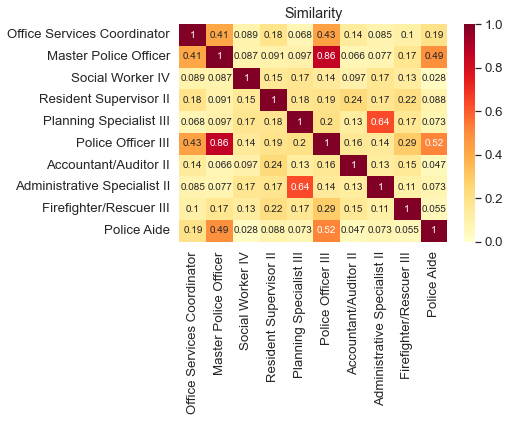

In [32]:
encode_and_plot(sample)

# One-hot Encoding vs Similarity Encoding

In [33]:
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import RidgeCV

In [34]:
y = df["Current Annual Salary"].values

In [35]:
clean_columns = {
    "gender": "one-hot",
    "department_name": "one-hot",
    "assignment_category": "one-hot",
    "Year First Hired": "numerical",
}

In [36]:
encoding_methods = ["one-hot", "similarity"]

In [37]:
encoders_dict = {
    "one-hot": OneHotEncoder(handle_unknown="ignore", sparse=False),
    "similarity": SimilarityEncoder(similarity="ngram"),
    "numerical": FunctionTransformer(None),
}

In [38]:
def make_pipeline(encoding_method):
    # static transformers from the other columns
    transformers = [
        (enc + "_" + col, encoders_dict[enc], [col])
        for col, enc in clean_columns.items()
    ]
    # adding the encoded column
    transformers += [(encoding_method, encoders_dict[encoding_method], [dirty_column])]
    pipeline = Pipeline(
        [
            # Use ColumnTransformer to combine the features
            ("union", ColumnTransformer(transformers=transformers, remainder="drop")),
            ("scaler", StandardScaler(with_mean=False)),
            ("clf", RidgeCV()),
        ]
    )
    return pipeline

In [39]:
all_scores = dict()

cv = KFold(n_splits=5, random_state=12, shuffle=True)
scoring = "r2"
for method in encoding_methods:
    pipeline = make_pipeline(method)
    scores = cross_val_score(pipeline, df, y, cv=cv, scoring=scoring)
    print(f"{method} encoding")
    print(f"{scoring} score:  mean: {np.mean(scores):.3f}; std: {np.std(scores):.3f}\n")
    all_scores[method] = scores

one-hot encoding
r2 score:  mean: 0.856; std: 0.034

similarity encoding
r2 score:  mean: 0.915; std: 0.012



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87197226-98be-42b2-8527-389082831299' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>